# Project Ensemble Learning

## 0.Load Libraries and Data

In [1]:
import numpy as np
import pandas as pd
# importing ploting libraries
import matplotlib.pyplot as plt   
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# To split the data into Train and Test Data
from sklearn.model_selection import train_test_split
# To calculate the accuracy score of the model
from sklearn.metrics import average_precision_score, confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix
# To Scale the Data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
# To One-Hot Encode the Categorical variables
from sklearn.preprocessing import OneHotEncoder

In [2]:
# Loading the data
df = pd.read_csv('/content/Data - Parkinsons.csv')

## 1.Eye-Ball Raw data

In [3]:
df.head(3)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634


In [4]:
#Shape of the Data
df.shape

(195, 24)

In [5]:
#Information of the Data - Type of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

* There are no Null values in the data columns
* All the columns are Numerical columns - There are no categorical features
* Looking at the central value, and percentiles the distribution of the feature columns varies by different columns. So we might need to scale the data based on the ML algorithm we use. For example, we need to scale the data for Logistic Regression or KNN etc.,

## 2. Data Distributions

In [6]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


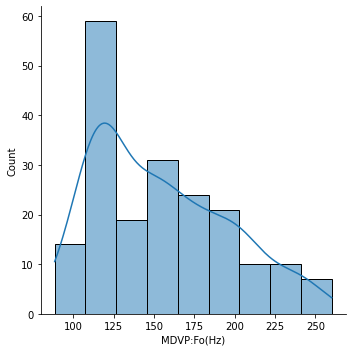

In [7]:
# Let's see the distribution of the data
sns.displot(df, x='MDVP:Fo(Hz)', kde = True)

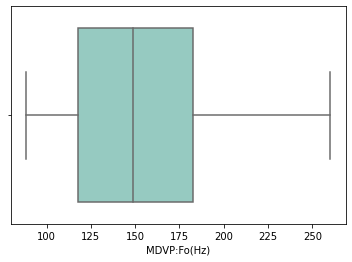

In [8]:
# Outliers testing
sns.boxplot(df['MDVP:Fo(Hz)'], palette="Set3")

* The distribution is slightly right skewed
* The feature does not have any outliers

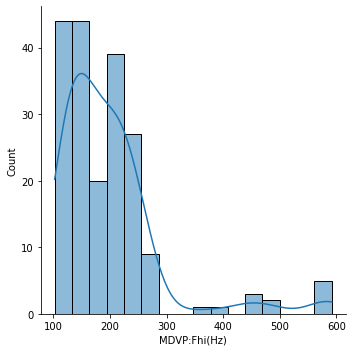

In [9]:
# Let's see the distribution of the data
sns.displot(df, x='MDVP:Fhi(Hz)', kde = True)

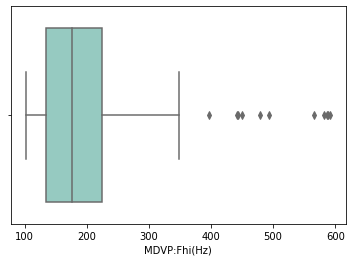

In [10]:
# Outliers testing
sns.boxplot(df['MDVP:Fhi(Hz)'], palette="Set3")

* The distribution is highly right skewed
* The feature does have many outliers
* Scaling the data will help to remove outliers

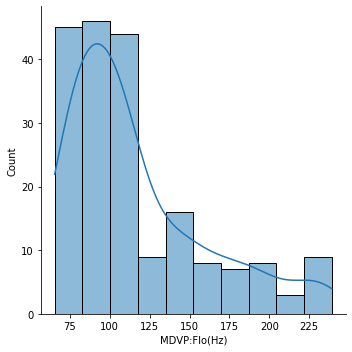

In [11]:
# Let's see the distribution of the data
sns.displot(df, x='MDVP:Flo(Hz)', kde = True)

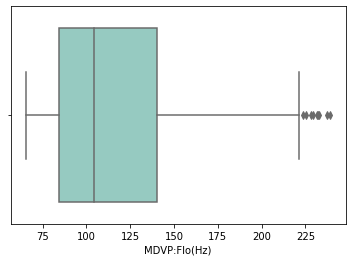

In [12]:
# Outliers testing
sns.boxplot(df['MDVP:Flo(Hz)'], palette="Set3")

* The distribution is slightly right skewed
* The feature does have  outliers
* Scaling the data will help to remove outliers

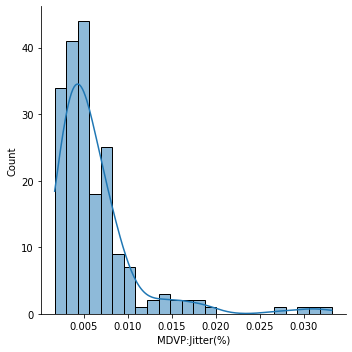

In [13]:
# Let's see the distribution of the data
sns.displot(df, x='MDVP:Jitter(%)', kde = True)

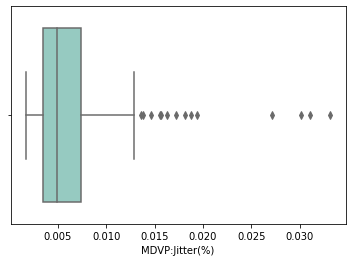

In [14]:
# Outliers testing
sns.boxplot(df['MDVP:Jitter(%)'], palette="Set3")

* The distribution is right skewed
* The feature does have outliers
* Scaling the data will help to remove outliers

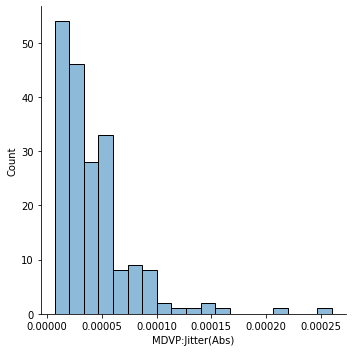

In [15]:
# Let's see the distribution of the data
sns.displot(df, x='MDVP:Jitter(Abs)', kde = True)

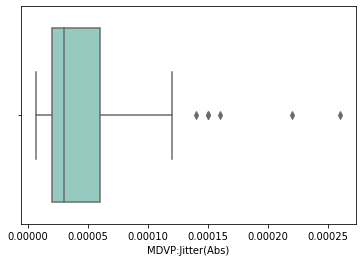

In [16]:
# Outliers testing
sns.boxplot(df['MDVP:Jitter(Abs)'], palette="Set3")

* The distribution is slightly right skewed
* The feature does have outliers
* Scaling the data will help to remove outliers

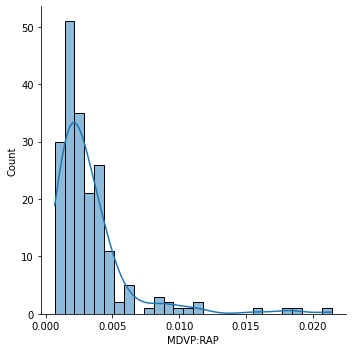

In [17]:
# Let's see the distribution of the data
sns.displot(df, x='MDVP:RAP', kde = True)

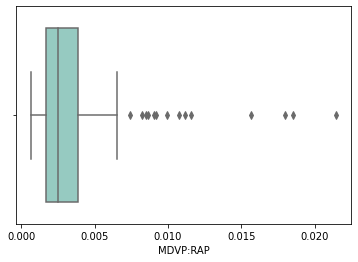

In [18]:
# Outliers testing
sns.boxplot(df['MDVP:RAP'], palette="Set3")

* The distribution is right skewed
* The feature does have outliers
* Scaling the data will help to remove outliers

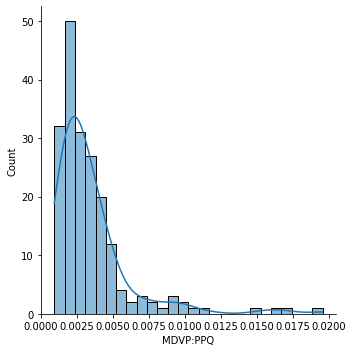

In [19]:
# Let's see the distribution of the data
sns.displot(df, x='MDVP:PPQ', kde = True)

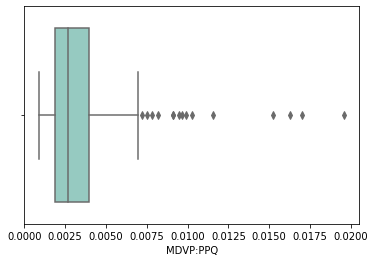

In [20]:
# Outliers testing
sns.boxplot(df['MDVP:PPQ'], palette="Set3")

* The distribution is right skewed
* The feature does have outliers
* Scaling the data will help to remove outliers

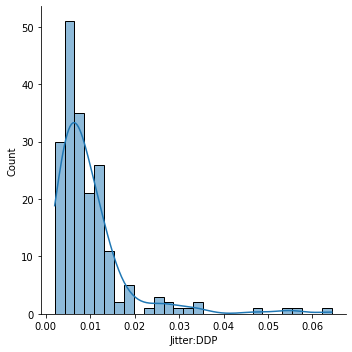

In [21]:
# Let's see the distribution of the data
sns.displot(df, x='Jitter:DDP', kde = True)

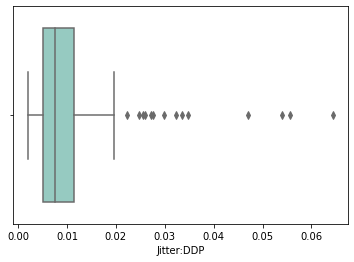

In [22]:
# Outliers testing
sns.boxplot(df['Jitter:DDP'], palette="Set3")

* The distribution is highly right skewed
* The feature does have lot of outliers
* Scaling the data will help to remove outliers

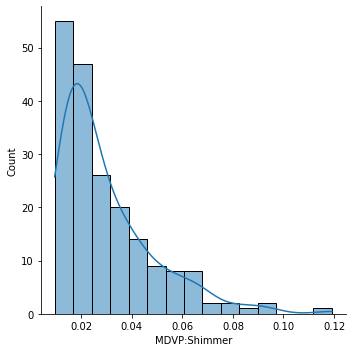

In [23]:
# Let's see the distribution of the data
sns.displot(df, x='MDVP:Shimmer', kde = True)

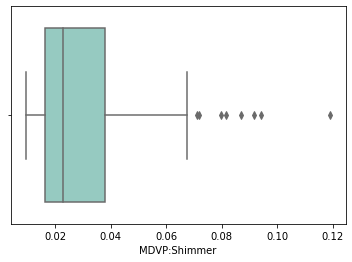

In [24]:
# Outliers testing
sns.boxplot(df['MDVP:Shimmer'], palette="Set3")

* The distribution is right skewed
* The feature does have outliers
* Scaling the data will help to remove outliers


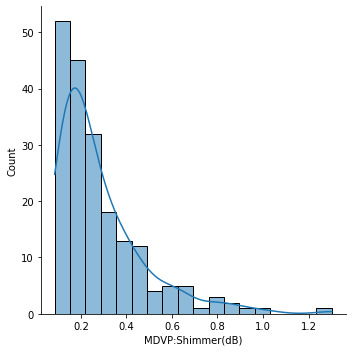

In [25]:
# Let's see the distribution of the data
sns.displot(df, x='MDVP:Shimmer(dB)', kde = True)

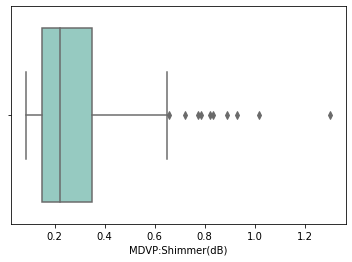

In [26]:
# Outliers testing
sns.boxplot(df['MDVP:Shimmer(dB)'], palette="Set3")

* The distribution is right skewed
* The feature does have outliers
* Scaling the data will help to remove outliers

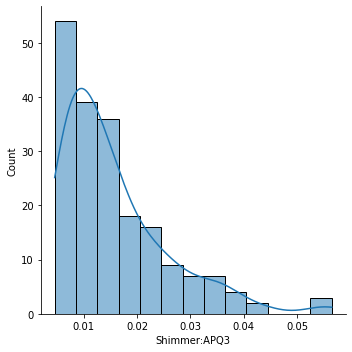

In [27]:
# Let's see the distribution of the data
sns.displot(df, x='Shimmer:APQ3', kde = True)

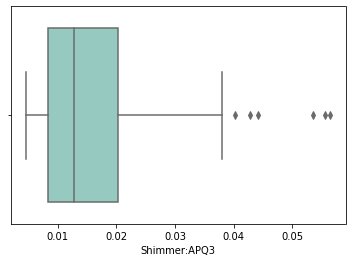

In [28]:
# Outliers testing
sns.boxplot(df['Shimmer:APQ3'], palette="Set3")

* The distribution is right skewed
* The feature does have outliers
* Scaling the data will help to remove outliers

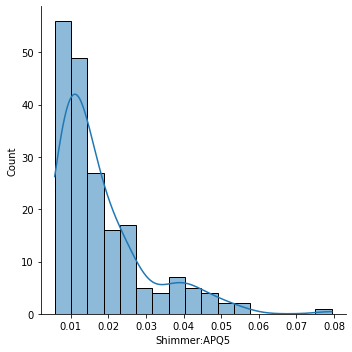

In [29]:
# Let's see the distribution of the data
sns.displot(df, x='Shimmer:APQ5', kde = True)

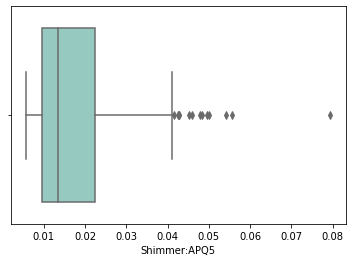

In [30]:
# Outliers testing
sns.boxplot(df['Shimmer:APQ5'], palette="Set3")

* The distribution is right skewed
* The feature does have outliers
* Scaling the data will help to remove outliers

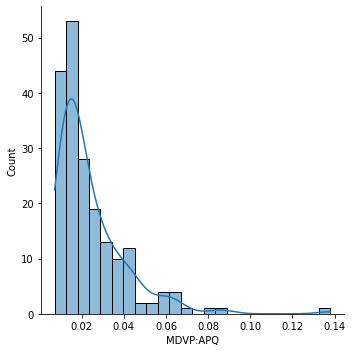

In [31]:
# Let's see the distribution of the data
sns.displot(df, x='MDVP:APQ', kde = True)

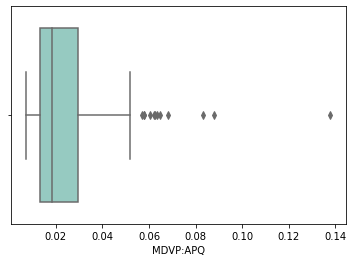

In [32]:
# Outliers testing
sns.boxplot(df['MDVP:APQ'], palette="Set3")

* The distribution is right skewed
* The feature does have outliers
* Scaling the data will help to remove outliers

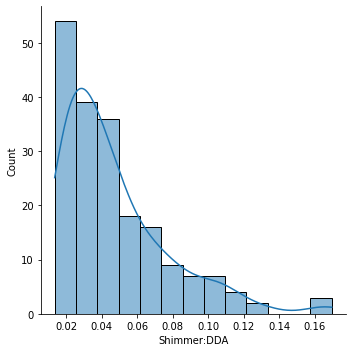

In [33]:
# Let's see the distribution of the data
sns.displot(df, x='Shimmer:DDA', kde = True)

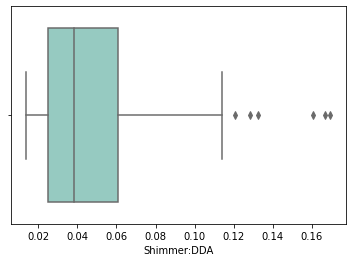

In [34]:
# Outliers testing
sns.boxplot(df['Shimmer:DDA'], palette="Set3")

* The distribution is right skewed
* The feature does have outliers
* Scaling the data will help to remove outliers

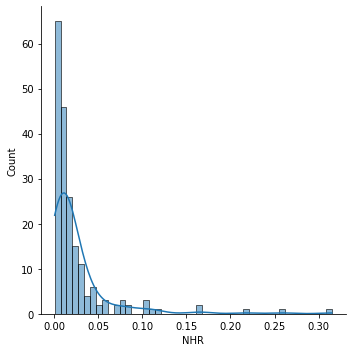

In [35]:
# Let's see the distribution of the data
sns.displot(df, x='NHR', kde = True)

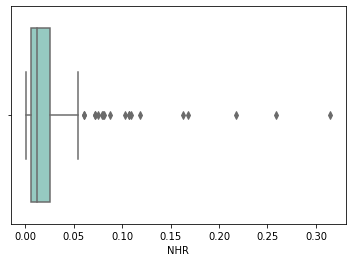

In [36]:
# Outliers testing
sns.boxplot(df['NHR'], palette="Set3")

* The distribution is highly right skewed
* The feature does have outliers
* Scaling the data will help to remove outliers

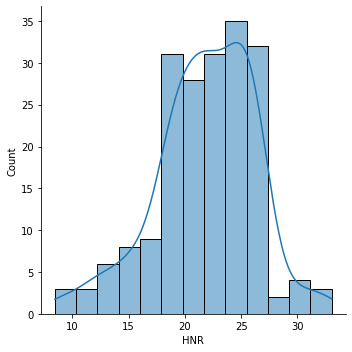

In [37]:
# Let's see the distribution of the data
sns.displot(df, x='HNR', kde = True)

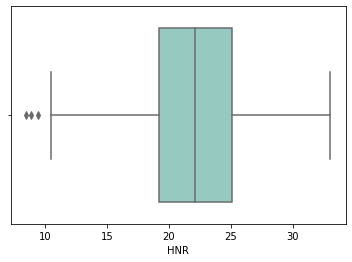

In [38]:
# Outliers testing
sns.boxplot(df['HNR'], palette="Set3")

* The distribution is slightly left skewed
* The feature does have outliers on left side
* Scaling the data will help to remove outliers

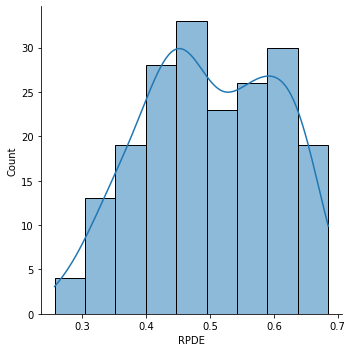

In [39]:
# Let's see the distribution of the data
sns.displot(df, x='RPDE', kde = True)

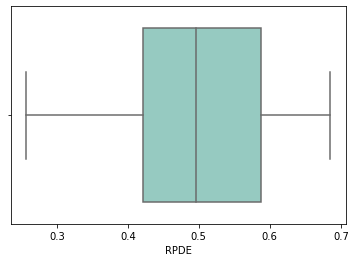

In [40]:
# Outliers testing
sns.boxplot(df['RPDE'], palette="Set3")

* The distribution is not skewed so much
* The feature does not have outliers
* There seems to be slight bi-modal distribution

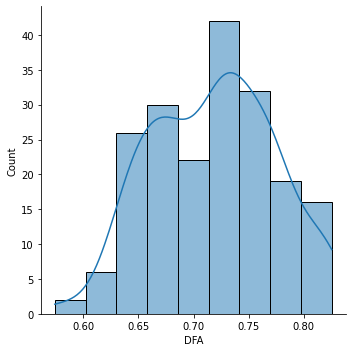

In [41]:
# Let's see the distribution of the data
sns.displot(df, x='DFA', kde = True)

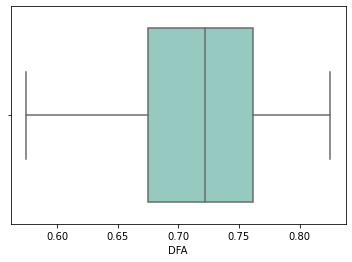

In [42]:
# Outliers testing
sns.boxplot(df['DFA'], palette="Set3")

* The distribution is slightly left skewed
* The feature does not have outliers
* There seems to be slight bi-modal distribution

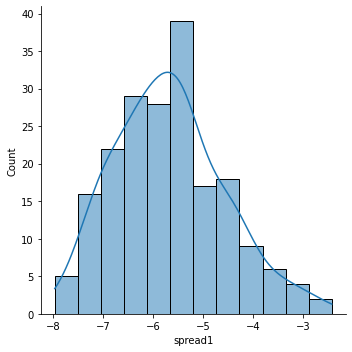

In [43]:
# Let's see the distribution of the data
sns.displot(df, x='spread1', kde = True)

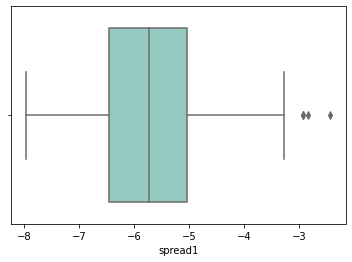

In [44]:
# Outliers testing
sns.boxplot(df['spread1'], palette="Set3")

* The distribution is not skewed much like other features (slightly skewed)
* The feature has few outliers (very few outliers)
* Scaling the data will help to remove outliers

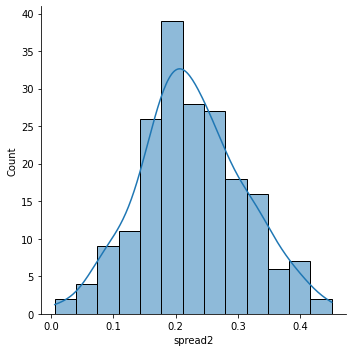

In [45]:
# Let's see the distribution of the data
sns.displot(df, x='spread2', kde = True)

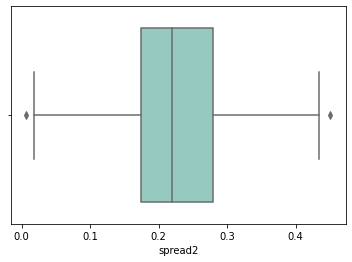

In [46]:
# Outliers testing
sns.boxplot(df['spread2'], palette="Set3")

* Data is almost normally distributed
* There are not many outliers (very few outliers)
* Scaling the data will help to remove outliers

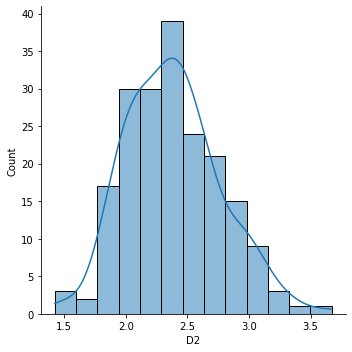

In [47]:
# Let's see the distribution of the data
sns.displot(df, x='D2', kde = True)

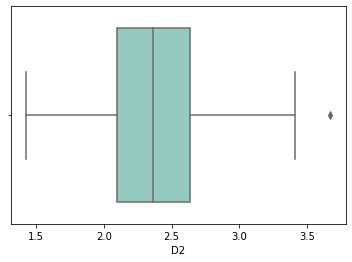

In [48]:
# Outliers testing
sns.boxplot(df['D2'], palette="Set3")

* Data is almost normally distributed
* There are not many outliers (very few outliers)
* Scaling the data will help to remove outliers

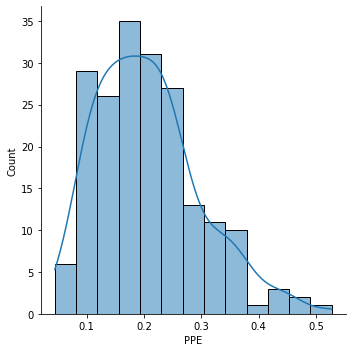

In [49]:
# Let's see the distribution of the data
sns.displot(df, x='PPE', kde = True)

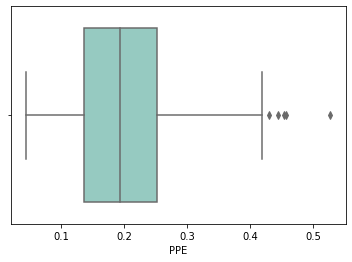

In [50]:
# Outliers testing
sns.boxplot(df['PPE'], palette="Set3")

* The distribution is slightly right skewed
* There are  outliers in the data
* Scaling the data will help to remove outliers

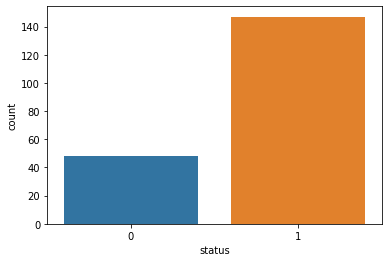

In [51]:
# Distribution Target Column
sns.countplot(df['status'])

* The Target column is unbalanced
* There are various techniques that can be used for making it balanced dataset - Upsample, Downsample
* In this modelling approach, we will use the Stratified splitting which will be better approach compared to Upsample and Downsample

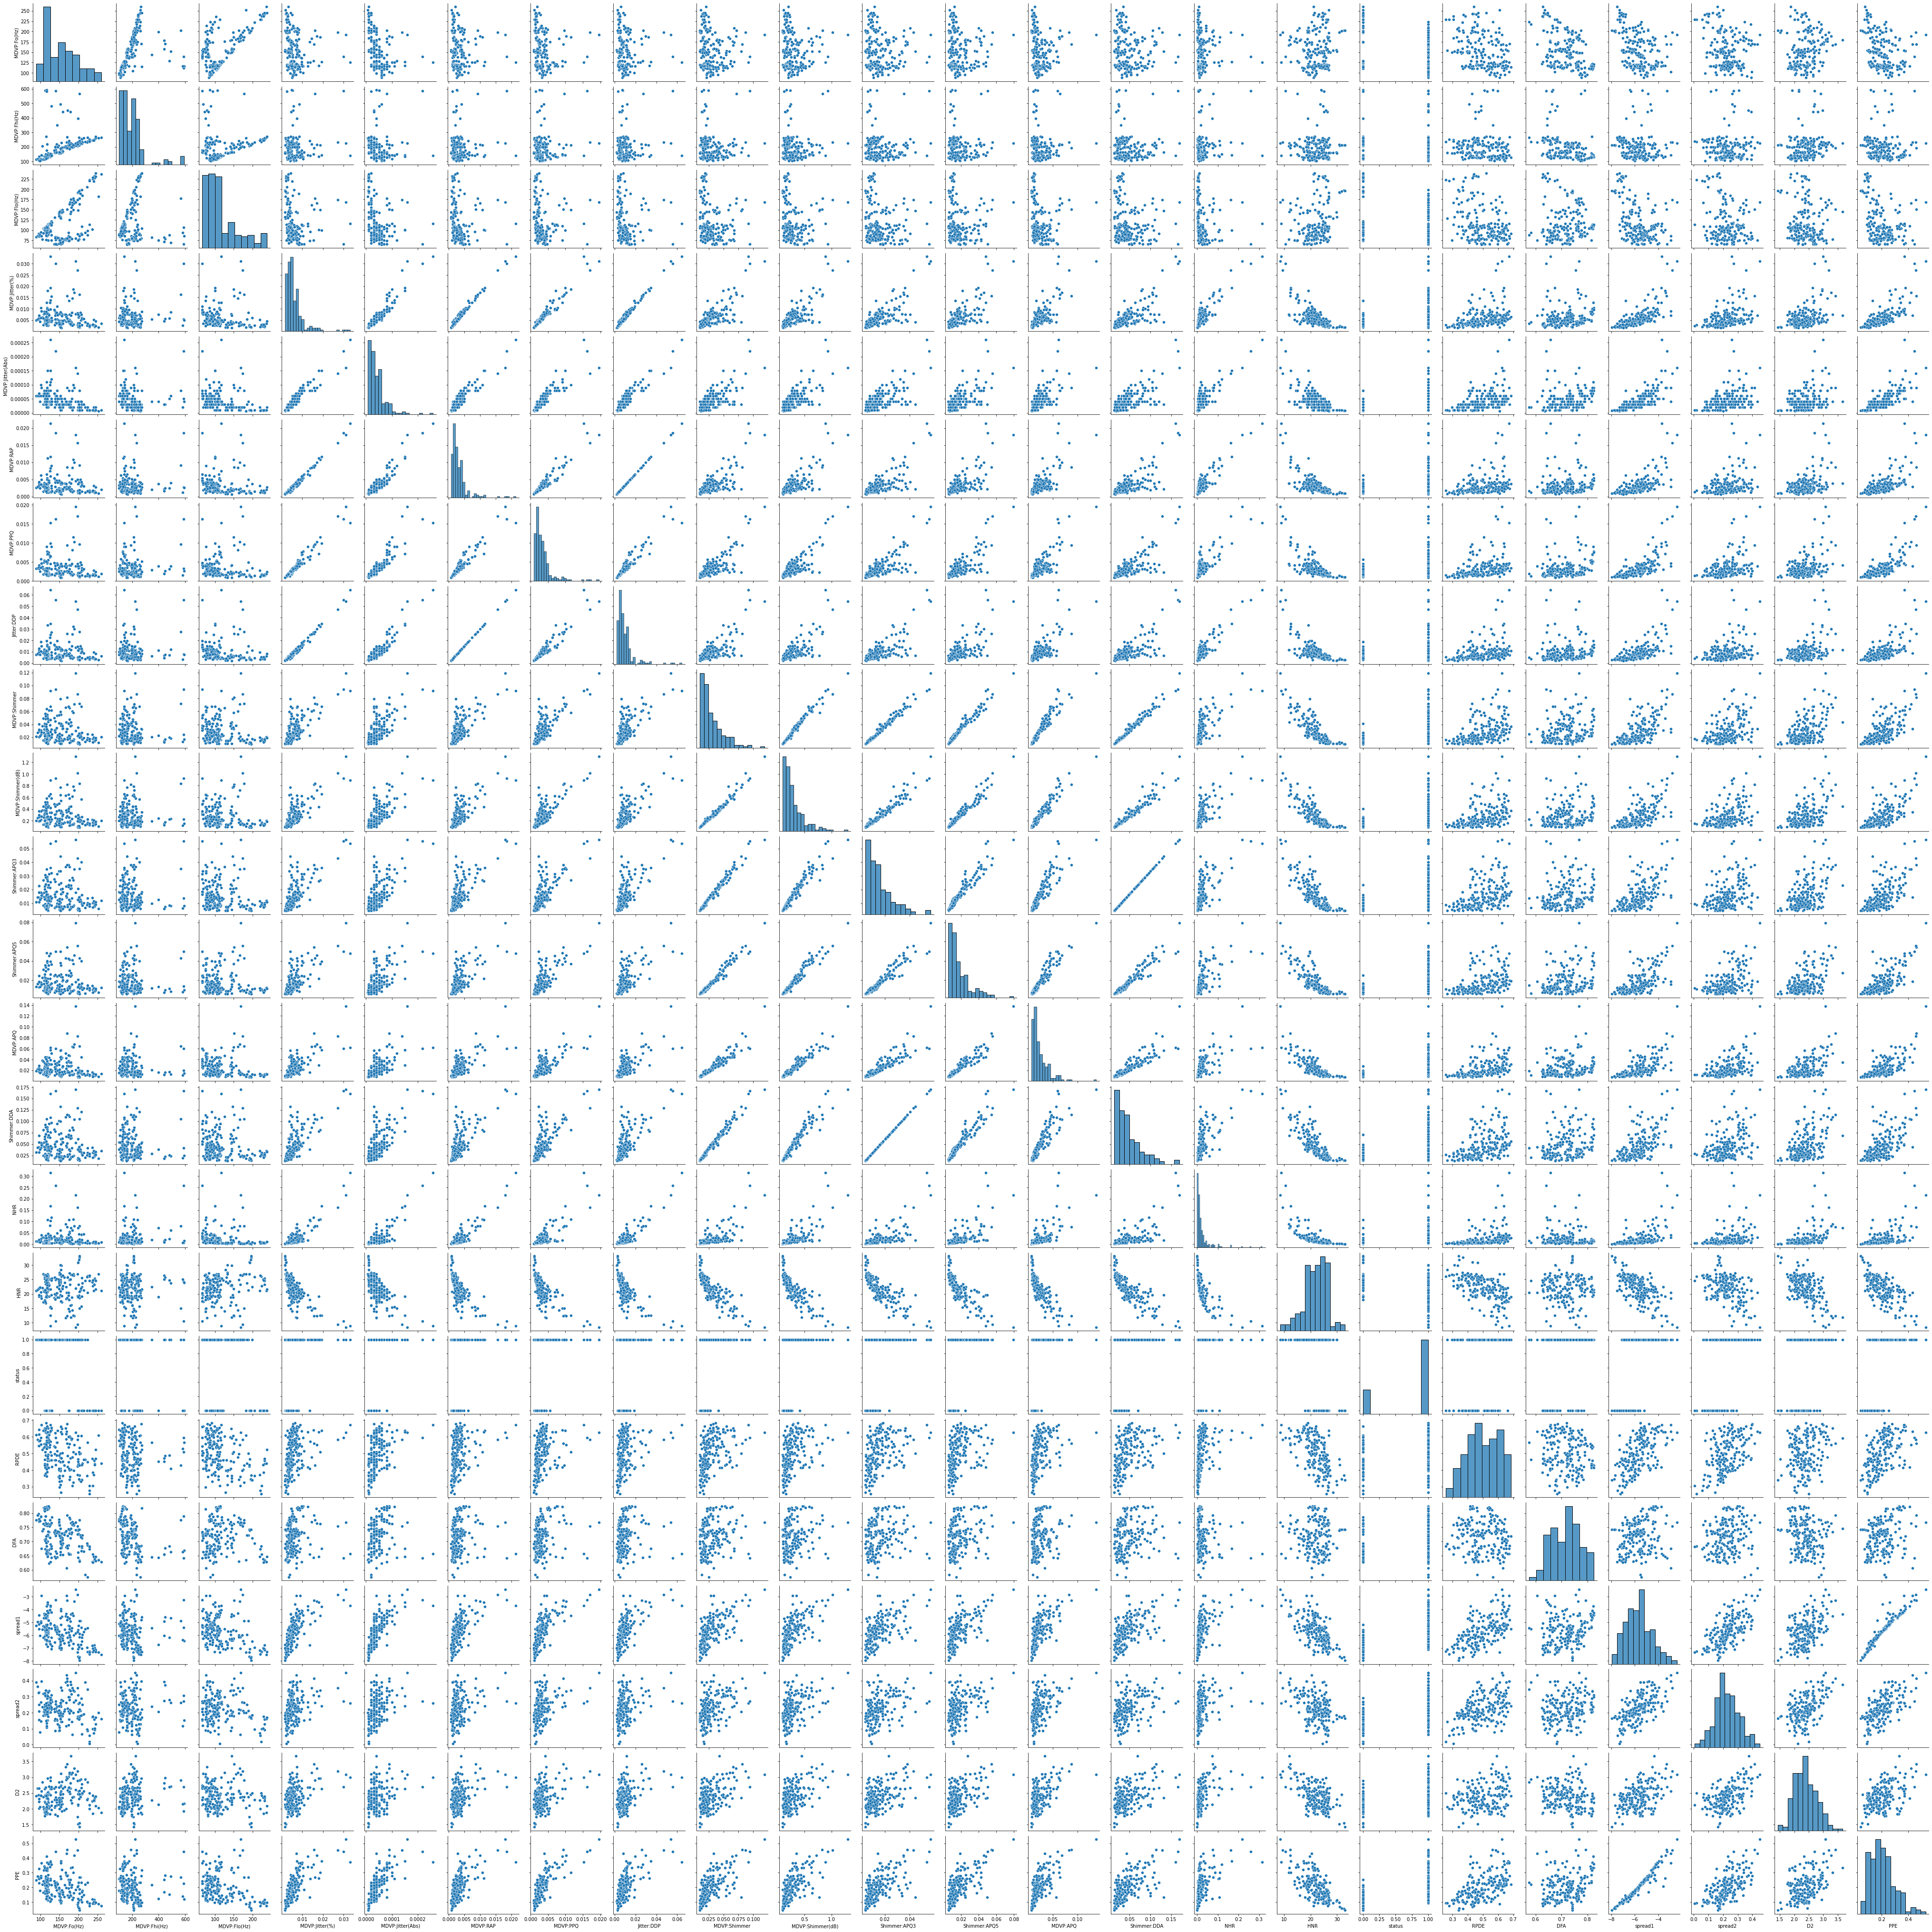

In [52]:
# Pairplot of all the features
sns.pairplot(df)

* Strong correlation between all the Shimmer related features (this might be due to some of them are redundant features). 
* Strong Positive correlation between MDVP (Jitter, RAP, PPQ, DDP) related features. They are highly correlated.
* Negative correlation between HNR & MDVP and HNR & Shimmer related features.

**Modelling Process -** Before the modelling process, we will do all the feature scaling as the distribution of the feature varies

**Correlation**

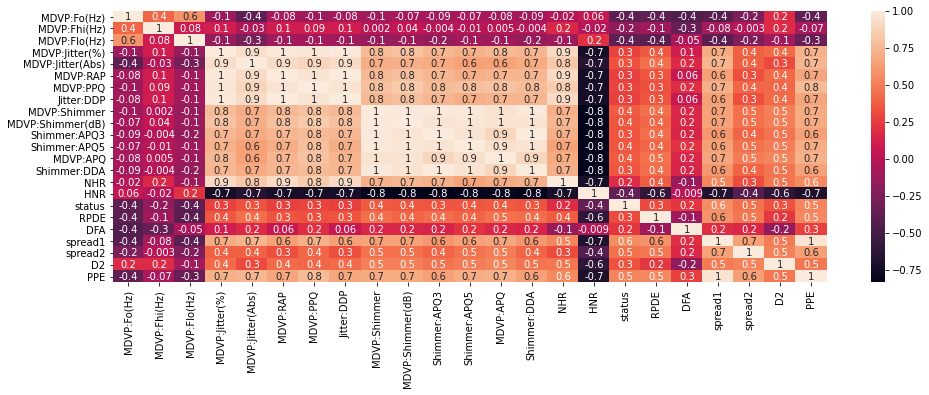

In [53]:
plt.figure(figsize=(16,5))
sns.heatmap(df.corr('pearson'), annot = True, fmt = '.1g')

* There is a strong correlation between the **Status** and the feature columns.
* Strong correlation between all the Shimmer related features (this might be due to some of them are derived features using formulas). They are highly correlated.
* Strong Positive correlation between MDVP (Jitter, RAP, PPQ, DDP) related features. They are highly correlated.
* The number of features can be further reduced lesser features using some of the techniques like PCA
* Spread1 and Spread2 has strong relation with **Status** column

## 5. Scaling the data

In [54]:
x = df.drop(['name', 'status'], axis = 1)

In [55]:
y = df[['status']]

In [56]:
# Standard Scaling all the columns
X_std = pd.DataFrame(StandardScaler().fit_transform(x))
X_std.columns = x.columns

## 4. Splitting Data

In [57]:
x_train, x_test, y_train, y_test = train_test_split(X_std, y, random_state = 42, stratify = y, test_size = 0.3)

## 6. Standard Classification Algorithms

**Logistic Regression**

In [99]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(random_state = 0)

In [100]:
# Fit the Logistic Regression Model on data
model_lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [101]:
# Predict price range of test data
y_pred_train_lr = model.predict(x_train)
y_pred_test_lr = model.predict(x_test)

In [102]:
# Let's measure the accuracy of this model's prediction
accuracy_score(y_test, y_pred_test_lr)

0.864406779661017

In [103]:
# And some other metrics 
print(classification_report(y_test, y_pred_test_lr, digits=2))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73        15
           1       0.91      0.91      0.91        44

    accuracy                           0.86        59
   macro avg       0.82      0.82      0.82        59
weighted avg       0.86      0.86      0.86        59



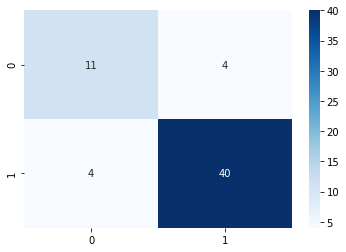

In [104]:
conf_mat = confusion_matrix(y_test, y_pred_test_lr)
df_conf_mat = pd.DataFrame(conf_mat)
plt.figure(figsize = (6,4))
sns.heatmap(df_conf_mat, annot=True,cmap='Blues', fmt='g')

**KNN**

In [155]:
from sklearn.neighbors import KNeighborsClassifier

In [160]:
# instantiate learning model (k = 3)
knn3 = KNeighborsClassifier(n_neighbors = 3)

# fitting the model
knn3.fit(x_train, y_train)

# predict the response
y_pred = knn3.predict(x_test)

# evaluate accuracy
print(accuracy_score(y_test, y_pred))

# instantiate learning model (k = 5)
knn5 = KNeighborsClassifier(n_neighbors=5)

# fitting the model
knn5.fit(x_train, y_train)

# predict the response
y_pred = knn5.predict(x_test)

# evaluate accuracy
print(accuracy_score(y_test, y_pred))

# instantiate learning model (k = 9)
knn7 = KNeighborsClassifier(n_neighbors=7)

# fitting the model
knn7.fit(x_train, y_train)

# predict the response
y_pred = knn7.predict(x_test)

# evaluate accuracy
print(accuracy_score(y_test, y_pred))

0.8813559322033898
0.8813559322033898
0.8813559322033898


In [161]:
y_pred_test_knn = knn3.predict(x_test)
y_pred_train_knn = knn3.predict(x_train)
# Accuracy of Test Data
accuracy_score(y_test, y_pred_test_knn)

0.8813559322033898

In [162]:
# And some other metrics 
print(classification_report(y_test, y_pred_test_knn, digits=2))

              precision    recall  f1-score   support

           0       0.79      0.73      0.76        15
           1       0.91      0.93      0.92        44

    accuracy                           0.88        59
   macro avg       0.85      0.83      0.84        59
weighted avg       0.88      0.88      0.88        59



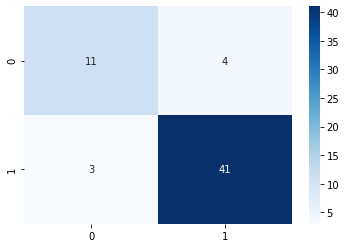

In [163]:
conf_mat = confusion_matrix(y_test, y_pred_test_knn)
df_conf_mat = pd.DataFrame(conf_mat)
plt.figure(figsize = (6,4))
sns.heatmap(df_conf_mat, annot=True,cmap='Blues', fmt='g')

**Naive Bayes**

In [121]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes
# create the model
nb_model = GaussianNB()

nb_model.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [122]:
y_pred_train_nb = nb_model.predict(x_train)
y_pred_test_nb = nb_model.predict(x_test)

In [123]:
# Let's measure the accuracy of this model's prediction
accuracy_score(y_test, y_pred_test_nb)

0.6440677966101694

In [124]:
# And some other metrics 
print(classification_report(y_test, y_pred_test_nb, digits=2))

              precision    recall  f1-score   support

           0       0.42      1.00      0.59        15
           1       1.00      0.52      0.69        44

    accuracy                           0.64        59
   macro avg       0.71      0.76      0.64        59
weighted avg       0.85      0.64      0.66        59



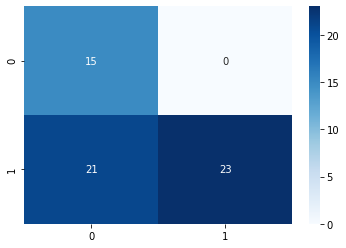

In [125]:
conf_mat = confusion_matrix(y_test, y_pred_test_nb)
df_conf_mat = pd.DataFrame(conf_mat)
plt.figure(figsize = (6,4))
sns.heatmap(df_conf_mat, annot=True, cmap='Blues', fmt='g')

## 7. Meta Classifier

In [146]:
from mlxtend.classifier import StackingClassifier

In [147]:
# Initializing Support Vector classifier
svc = SVC()

In [164]:
# Initializing the StackingCV classifier
sclf = StackingClassifier(classifiers = [nb_model, knn3, model_lr], meta_classifier = svc)

In [165]:
sclf.fit(x_train, y_train)

StackingClassifier(average_probas=False,
                   classifiers=[GaussianNB(priors=None, var_smoothing=1e-09),
                                KNeighborsClassifier(algorithm='auto',
                                                     leaf_size=30,
                                                     metric='minkowski',
                                                     metric_params=None,
                                                     n_jobs=None, n_neighbors=3,
                                                     p=2, weights='uniform'),
                                LogisticRegression(C=1.0, class_weight=None,
                                                   dual=False,
                                                   fit_intercept=True,
                                                   intercept_scaling=1,
                                                   l1_ratio=None, max_iter...
                                                   warm_start=False)],
      

In [166]:
y_pred_test_meta = sclf.predict(x_test)

In [167]:
# Let's measure the accuracy of this model's prediction
accuracy_score(y_test, y_pred_test_meta)

0.8813559322033898

In [168]:
# And some other metrics 
print(classification_report(y_test, y_pred_test_meta, digits=2))

              precision    recall  f1-score   support

           0       0.79      0.73      0.76        15
           1       0.91      0.93      0.92        44

    accuracy                           0.88        59
   macro avg       0.85      0.83      0.84        59
weighted avg       0.88      0.88      0.88        59



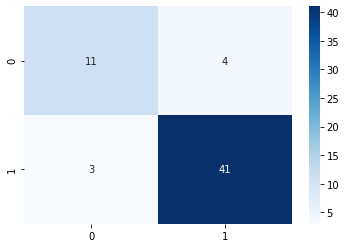

In [154]:
conf_mat = confusion_matrix(y_test, y_pred_test_meta)
df_conf_mat = pd.DataFrame(conf_mat)
plt.figure(figsize = (6,4))
sns.heatmap(df_conf_mat, annot=True, cmap='Blues', fmt='g')

* Naive Bayes performs worse compared to Logistic and KNN as Naive Bayes do not do well with numerical features. The data contains all numerical features and this is the reason that Naive Bayes performs worse.
* Out of KNN and Logistic models, KNN performs the best.
* Using Meta classifer on all the three models did not improve the accuracy or f1 score much.

## 8.Ensemble model

**Bagging Classifier**

In [172]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bgcl = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50,random_state=1)

bgcl = bgcl.fit(x_train, y_train)

In [176]:
y_pred_test_bagging = bgcl.predict(x_test)

In [177]:
# And some other metrics 
print(classification_report(y_test, y_pred_test_bagging, digits=2))

              precision    recall  f1-score   support

           0       0.71      0.80      0.75        15
           1       0.93      0.89      0.91        44

    accuracy                           0.86        59
   macro avg       0.82      0.84      0.83        59
weighted avg       0.87      0.86      0.87        59



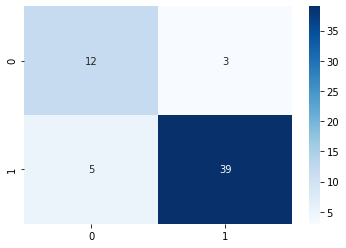

In [178]:
conf_mat = confusion_matrix(y_test, y_pred_test_bagging)
df_conf_mat = pd.DataFrame(conf_mat)
plt.figure(figsize = (6,4))
sns.heatmap(df_conf_mat, annot=True, cmap='Blues', fmt='g')

**XGBoost Classifier**

In [180]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [181]:
y_pred_test_xgb = xgb.predict(x_test)

In [182]:
# And some other metrics 
print(classification_report(y_test, y_pred_test_xgb, digits=2))

              precision    recall  f1-score   support

           0       0.92      0.73      0.81        15
           1       0.91      0.98      0.95        44

    accuracy                           0.92        59
   macro avg       0.92      0.86      0.88        59
weighted avg       0.92      0.92      0.91        59



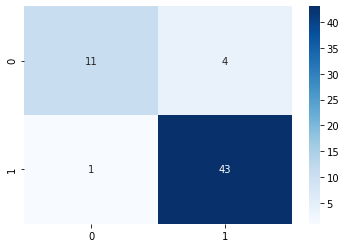

In [183]:
conf_mat = confusion_matrix(y_test, y_pred_test_xgb)
df_conf_mat = pd.DataFrame(conf_mat)
plt.figure(figsize = (6,4))
sns.heatmap(df_conf_mat, annot=True, cmap='Blues', fmt='g')

**Random Forest Classifier**

In [184]:
from sklearn.ensemble import RandomForestClassifier

In [185]:
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1)
rfcl = rfcl.fit(x_train, y_train)

In [187]:
y_pred_test_rf = rfcl.predict(x_test)

In [188]:
# And some other metrics 
print(classification_report(y_test, y_pred_test_rf, digits=2))

              precision    recall  f1-score   support

           0       0.69      0.73      0.71        15
           1       0.91      0.89      0.90        44

    accuracy                           0.85        59
   macro avg       0.80      0.81      0.80        59
weighted avg       0.85      0.85      0.85        59



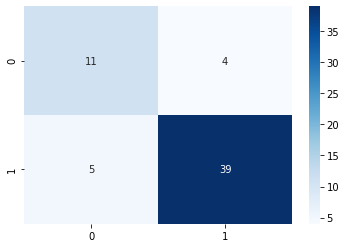

In [189]:
conf_mat = confusion_matrix(y_test, y_pred_test_rf)
df_conf_mat = pd.DataFrame(conf_mat)
plt.figure(figsize = (6,4))
sns.heatmap(df_conf_mat, annot=True, cmap='Blues', fmt='g')

## 9.Compare all the models

**Conclusion -**
* Naive Bayes is the worst performing standard classification algorithm
* KNN performs best out of Logistc, Naive Bayes and KNN with **88%** accuracy
* Meta Classifier did not help much in improving the accuracy (Though usually it improves the accuracy when we combine lot of models)
* Xgboost performs best out of Standard Classification Algorithm and other ensemble algorithms Bagging and Random Forest with **92%** accuracy
* **Xgboost** is the best algorithm out of Ensemble and Standard Classification Algorithm with 92% Accuracy
* **KNN** is the best algorithm among Standard Classification Algorithm with 88% Accuracy